In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
pd.options.display.float_format = "{:.2f}".format

In [3]:
cols = ['class','tweet_text']
positive = pd.read_csv('Arabic_tweets_positive.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)
positive.head()

,class,tweet_text
0,pos,هه خلي فضولش ف جيبش 🌚
1,pos,موجود ماسافرت 😊
2,pos,: مسابقة #43 #متابعي_شامخ فقط# 🔘السحب على200💰ر...
3,pos,اللهم امين 🌺
4,pos,يعني اذا ما احبج احب منو؟ 💘


In [4]:
cols = ['class','tweet_text']
negative = pd.read_csv('Arabic_tweets_negative.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)
negative.head()

,class,tweet_text
0,neg,انمي Family Guy الموسم الحلقة السادسة مترجمة H...
1,neg,صدااع من الغباء لي ساعه افكر وش اقول بس غبائها...
2,neg,قتيلا وجريحا… حصيلة تفرقة المتظاهرين في كربلاء...
3,neg,اللهم من أصلح شأنهم وجمع كلمتهم ووحد صفهم ياقا...
4,neg,كوميديا.. الذهبية تذهب بالخطأ لصاحبة المركز ال...


In [5]:
final_data = pd.concat([positive, negative], axis=0)
final_data.head()

,class,tweet_text
0,pos,هه خلي فضولش ف جيبش 🌚
1,pos,موجود ماسافرت 😊
2,pos,: مسابقة #43 #متابعي_شامخ فقط# 🔘السحب على200💰ر...
3,pos,اللهم امين 🌺
4,pos,يعني اذا ما احبج احب منو؟ 💘


In [6]:
from sklearn.utils import shuffle
final_data = shuffle(final_data).reset_index()
final_data.head()

,index,class,tweet_text
0,25864,pos,: حين يحبك إنسان تشعر بانك جميل والدنيا واسعة ...
1,36169,pos,لا صبحك بالشوق وجه تحبه ودك يصير العمر كله صبا...
2,4461,neg,: إن الفرحة العظمى والتي لا تعدلها فرحة، هي ال...
3,39818,neg,: انتبه لنظراتك وراقب قلبك 💔
4,69254,pos,(ذٰلك فضل الله يؤتيه من يشاء ۚ والله ذو الفضل ...


In [7]:
final_data = final_data.drop('index',axis=1)
final_data.head()

,class,tweet_text
0,pos,: حين يحبك إنسان تشعر بانك جميل والدنيا واسعة ...
1,pos,لا صبحك بالشوق وجه تحبه ودك يصير العمر كله صبا...
2,neg,: إن الفرحة العظمى والتي لا تعدلها فرحة، هي ال...
3,neg,: انتبه لنظراتك وراقب قلبك 💔
4,pos,(ذٰلك فضل الله يؤتيه من يشاء ۚ والله ذو الفضل ...


In [8]:
print("positive tweets: ",len(final_data))

positive tweets:  148328


In [9]:
final_data['tweet_text'].head()

0    : حين يحبك إنسان تشعر بانك جميل والدنيا واسعة ...
1    لا صبحك بالشوق وجه تحبه ودك يصير العمر كله صبا...
2    : إن الفرحة العظمى والتي لا تعدلها فرحة، هي ال...
3                         : انتبه لنظراتك وراقب قلبك 💔
4    (ذٰلك فضل الله يؤتيه من يشاء ۚ والله ذو الفضل ...
Name: tweet_text, dtype: object

In [10]:
final_data['class'].sample(5)

143316    pos
64551     neg
121383    pos
7698      neg
106668    pos
Name: class, dtype: object

In [11]:
final_data[final_data.isnull().any(axis=1)].head()
np.sum(final_data.isnull().any(axis=1))

0

In [12]:
final_data.isnull().any(axis=0)

class         False
tweet_text    False
dtype: bool

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148328 entries, 0 to 148327
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   class       148328 non-null  object
 1   tweet_text  148328 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [14]:
for letter in '#.][!XR':
    final_data['tweet_text'] = final_data['tweet_text'].astype(str).str.replace(letter,'')

In [15]:
final_data.sample(5)

,class,tweet_text
81668,neg,: شرح حديث : ( يصبح الرجل مؤمنا ويمسي كافرا ) ...
74436,pos,: جماهير الزعيم مايدور بالساحه الرياضيه حاليا ...
82443,neg,: 🎙عمر السومة :( إدارة النصر تفاوضت معي وأعطيت...
23270,pos,: ( لا اله الا الله ) تبغى اضمن لك اكثر من اضا...
15100,neg,الدنياا مقلوبة 🤐


In [16]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [17]:
def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", str(text),  flags=re.UNICODE).split())

In [18]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [19]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [20]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [21]:
def processPost(tweet): 

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    #tweet=remove_repeating_char(tweet)


    # remove emoji
    tweet=remove_emoji(tweet)
    
    return tweet

In [22]:
final_data["tweet_text"] = final_data['tweet_text'].apply(lambda x: processPost(x))

In [23]:
final_data["tweet_text"] = final_data['tweet_text'].apply(remove_non_arabic)

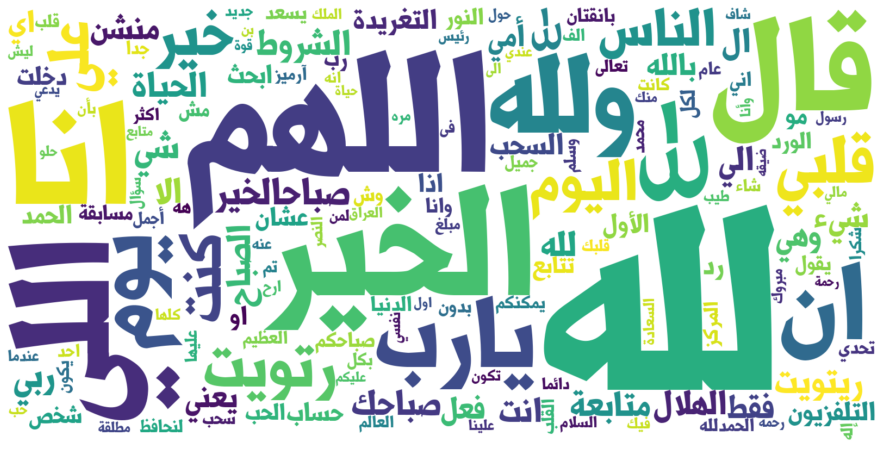

In [24]:
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from itertools import islice
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


text = " ".join(line for line in final_data['tweet_text'])
stop_ar = stopwords.words('arabic') 
# add more stop words here like numbers, special characters, etc. It should be customized for your project

top_words = {}
words = text.split()
for w in words:
    if w in stop_ar:
        continue
    else:
        if w not in top_words:
            top_words[w] = 1
        else:
            top_words[w] +=1

# Sort the dictionary of the most frequent words
top_words = {k: v for k, v in sorted(top_words.items(), key=lambda item: item[1], reverse = True)}

# select the first 150 most frequent words
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
for_wc = take(150, top_words.items())

# you need to reshape your words to be shown properly and turn the result into a dictionary
dic_data = {}
for t in for_wc:
    r = arabic_reshaper.reshape(t[0]) # connect Arabic letters
    bdt = get_display(r) # right to left
    dic_data[bdt] = t[1] 

# Plot
wc = WordCloud(background_color="white", width=1600, height=800,max_words=400 ,font_path='Shoroq-Font.ttf').generate_from_frequencies(dic_data)
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [25]:
final_data["tweet_text"] = final_data['tweet_text'].apply(lambda x:remove_repeating_char(x))

In [ ]:
final_data["tweet_text"] = final_data['tweet_text'].apply(lambda x:normalize_arabic(x))

In [87]:
tokenizer = RegexpTokenizer(r'\w+')
final_data["tweet_text"] = final_data["tweet_text"].apply(tokenizer.tokenize)

In [88]:
final_data["tweet_text"].sample(5)

4420     [الجزائر, تنتظر, تسليم, الوزيرين, شكيب, خليل, ...
24683                   [شكرا, جدا, واله, اله, يكرمك, بجد]
56485                  [ه, اعطتنا, دروس, ودر, باقل, دقيقه]
66841      [عندما, تكون, اب, فستفعل, اي, شيء, لتخف, الالم]
24832                                  [عجبتني, اكثر, تجي]
Name: tweet_text, dtype: object

In [89]:
stopwords_list = stopwords.words('arabic')
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [70]:
print(len(stopwords_list))

754


In [71]:
listToStr = ' '.join([str(elem) for elem in stopwords_list])
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [72]:
final_data["tweet_text"]=final_data["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [91]:
all_words = [word for tokens in final_data["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in final_data["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1361808 words total, with a vocabulary size of 107156
Max sentence length is 1043


In [92]:
#wordcloud
counter = Counter(all_words)
counter.most_common(25)

[('اله', 23536),
 ('علي', 21003),
 ('ان', 11495),
 ('الي', 9626),
 ('انا', 7373),
 ('الهم', 7206),
 ('الخير', 5974),
 ('الا', 5145),
 ('قال', 4286),
 ('واله', 4281),
 ('يارب', 4091),
 ('انت', 3876),
 ('يوم', 3220),
 ('قلبي', 2965),
 ('اي', 2917),
 ('اذا', 2829),
 ('حتي', 2774),
 ('او', 2729),
 ('خير', 2708),
 ('رتويت', 2657),
 ('اليوم', 2600),
 ('ال', 2542),
 ('اني', 2521),
 ('كنت', 2520),
 ('الناس', 2418)]

In [69]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

In [70]:
y=final_data['class']
y.value_counts()

pos    76094
neg    72234
Name: class, dtype: int64

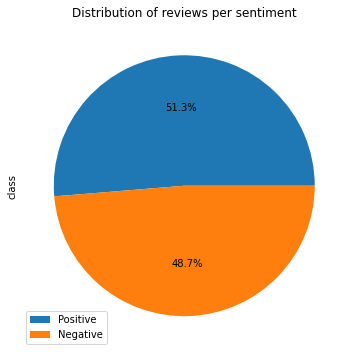

In [71]:
final_data['class'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%' )
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')


In [72]:
# 0 = neg and 1 = pos
label_mapping = {"pos": 1, "neg":0}
final_data["class"] = final_data["class"].map(label_mapping)
final_data.head()

,index,class,tweet_text
0,57405,0,"[كيدا, خالد, تهون, عشره, البلوكات, مش, تشاركني..."
1,25483,1,"[حرفيا, والله]"
2,439,1,"[رحيم, يدريك, سر, فضله, كريم, العطايا, يعطي, و..."
3,26363,0,"[قالوا, تفشي, بسر, قلت, تم, انسحاب, كامل, الاخ..."
4,47383,1,"[الله, احلي, بدايه]"


In [73]:
# احسب المصطلجات الفريت

In [74]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

unigramdataGet= word_vectorizer.fit_transform(final_data['tweet_text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features>0] = 1

unigramdata_features.head()

,00,10,100,100ريال,10k,112019,115,119,1200,14,...,٣٠,٥٢,ٱل,ٱلله,ٱللہ,ٲلبال,کنت,ڪريم,ڪل,ۆالسرۆر
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [75]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(final_data['class'])
final_data['class'] = encpro

In [76]:
y=final_data['class']
X=unigramdata_features

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [78]:
y_test.value_counts()

1    15142
0    14524
Name: class, dtype: int64

In [79]:
y_train.value_counts()



1    60952
0    57710
Name: class, dtype: int64

In [80]:
print("Train Size: ", len(X_train))
print("Test Size:  ", len(X_test))

Train Size:  118662
Test Size:   29666


In [107]:
#ensemble model python code
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb

GaussianNB()

In [108]:

y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))

Accuracy= 0.756


In [109]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78     14524
           1       0.86      0.62      0.72     15142

    accuracy                           0.76     29666
   macro avg       0.78      0.76      0.75     29666
weighted avg       0.78      0.76      0.75     29666



In [110]:
RC= RidgeClassifier()
RC= RC.fit(X_train , y_train)
RC

RidgeClassifier()

In [111]:
y_pred = RC.predict(X_test)
rc_1=RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)))

Accuracy= 0.821


In [112]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82     14524
           1       0.84      0.80      0.82     15142

    accuracy                           0.82     29666
   macro avg       0.82      0.82      0.82     29666
weighted avg       0.82      0.82      0.82     29666



In [113]:
LR= LogisticRegression(penalty = 'l2', C = 1)
LR= LR.fit(X_train , y_train)
LR

LogisticRegression(C=1)

In [114]:
y_pred = LR.predict(X_test)
lr_1=LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy= 0.826


In [115]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     14524
           1       0.85      0.80      0.82     15142

    accuracy                           0.83     29666
   macro avg       0.83      0.83      0.83     29666
weighted avg       0.83      0.83      0.83     29666



In [96]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf= clf.fit(X_train , y_train)
clf

RandomForestClassifier(n_estimators=10)

In [99]:
y_pred = clf.predict(X_test)
clf_1=clf.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy= 0.839


In [106]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     14524
           1       0.86      0.82      0.84     15142

    accuracy                           0.84     29666
   macro avg       0.84      0.84      0.84     29666
weighted avg       0.84      0.84      0.84     29666



In [116]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", "F1"]


x.add_row(["Naive Bayes Algorithm", round(nb_1,2)])
x.add_row(["Ridge Classifier Algorithm",  round(rc_1,2)])
x.add_row(["Logistic Regression Algorithm", round(lr_1,2)])
x.add_row(["Random Forest Algorithm", round(clf_1,2)])

print(x)
print('\n')



Comparison of all algorithms on F1 score
+-------------------------------+------+
|             Model             |  F1  |
+-------------------------------+------+
|     Naive Bayes Algorithm     | 0.76 |
|   Ridge Classifier Algorithm  | 0.82 |
| Logistic Regression Algorithm | 0.83 |
|    Random Forest Algorithm    | 0.84 |
+-------------------------------+------+




In [117]:
tv=['  انا اليوم سعيد جدا عشان الهلال فاز ']
tv2=['اقسم بالله لو تجيب طاري الهلال على لسانك لا اقصه لك ']

In [118]:
pred=clf.predict(word_vectorizer.transform(tv))
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (tv,prediction)

['  انا اليوم سعيد جدا عشان الهلال فاز ']    Prediction
0           1


In [119]:
pred=clf.predict(word_vectorizer.transform(tv2))
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (tv2,prediction)

['اقسم بالله لو تجيب طاري الهلال على لسانك لا اقصه لك ']    Prediction
0           0


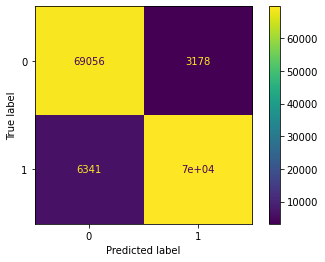

In [120]:
#clf=RandomForestClassifier(n_estimators=10)
#clf= clf.fit(X_train , y_train)

# make predictions with your classifier
y_pred = clf.predict(X)         
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
M = confusion_matrix(y, y_pred)
tn, fp, fn, tp = M.ravel() 
# plotting the confusion matrix
plot_confusion_matrix(clf, X, y)
plt.show()

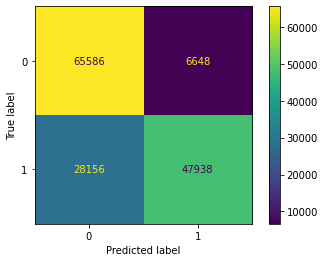

In [121]:
#nb = nb=GaussianNB()
#nb.fit(X_train , y_train) # fit your classifier

# make predictions with your classifier
y_pred = nb.predict(X)         
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
M = confusion_matrix(y, y_pred)
tn, fp, fn, tp = M.ravel() 
# plotting the confusion matrix
plot_confusion_matrix(nb, X, y)
plt.show()

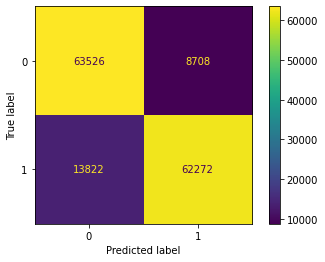

In [122]:
#LR= LogisticRegression(penalty = 'l2', C = 1)
#LR= LR.fit(X_train , y_train)

# make predictions with your classifier
y_pred = LR.predict(X)         
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
M = confusion_matrix(y, y_pred)
tn, fp, fn, tp = M.ravel() 
# plotting the confusion matrix
plot_confusion_matrix(LR, X, y)
plt.show()

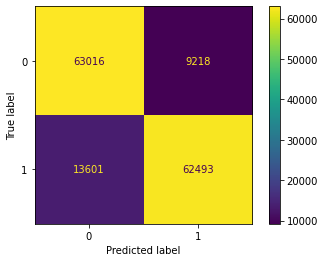

In [123]:
#RC= RidgeClassifier()
#RC.fit(X_train , y_train) # fit your classifier

# make predictions with your classifier
y_pred = RC.predict(X)         
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
M = confusion_matrix(y, y_pred)
tn, fp, fn, tp = M.ravel() 
# plotting the confusion matrix
plot_confusion_matrix(RC, X, y)
plt.show()